# Monte Carlo Stock Price Simulation

This notebook demonstrates a **Monte Carlo stock price simulation** using the **Geometric Brownian Motion (GBM)** model to generate realistic stock price movements over a 23-hour trading period.

## What this simulation does:

### 📊 **Data Generation**
- Generates **16,560 data points** at 5-second intervals (23 hours × 60 minutes × 12 intervals per minute)
- **Trading Hours**: 6 PM to 5 PM next day (23-hour window)
- Uses Monte Carlo methods with random shocks to simulate realistic price movements

### 🔬 **Mathematical Model**
- **Geometric Brownian Motion**: `dS = S(μdt + σdW)`
  - `S` = Stock price
  - `μ` = Drift rate (trend)
  - `σ` = Volatility
  - `dW` = Random shock (Wiener process)

### 📈 **Key Features**
- **Starting price**: $100.00
- **Time intervals**: 5-second granularity
- **Trading window**: 6 PM to 5 PM (23 hours)
- **Volatility**: 2% daily volatility
- **Drift**: Small positive trend (0.01% daily)
- **Reproducible**: Uses random seed for consistent results

### ⚙️ **Configuration**
- **CSV Export Control**: `SAVE_TO_CSV` global constant
  - Set to `True` to enable CSV export (default)
  - Set to `False` to disable CSV export and keep data in memory only

### 🎯 **Outputs**
1. **Price chart**: 23-hour price movements with 5-second resolution
2. **Statistics**: Min/max prices, percentage change, total data points
3. **CSV export**: Data saved for further analysis (controlled by `SAVE_TO_CSV` constant)
4. **DataFrame**: `stock_df` - In-memory pandas DataFrame containing timestamp and price data

This simulation provides a foundation for testing trading strategies and understanding market dynamics in a controlled environment with realistic trading hours.

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Monte Carlo Stock Price Simulation for configurable intervals
def generate_stock_price_data(interval=5, hours=23):
    """
    Generate stock price data for specified hours using Monte Carlo method
    
    Parameters:
    -----------
    interval : int, default=5
        Time interval in seconds between each price point
    hours : int, default=23
        Number of hours to simulate (6 PM to 5 PM next day = 23 hours)
    """
    # Parameters
    initial_price = 100.0  # Starting stock price
    drift = 0.0001  # Daily drift (scaled for interval)
    volatility = 0.02  # Daily volatility
    
    # Calculate time step and number of steps based on interval
    time_step = interval / (24 * 60 * 60)  # Convert seconds to fraction of day
    num_steps = int(hours * 60 * 60 / interval)  # Total intervals in specified hours
    
    # Generate time series starting at 6 PM (18:00)
    start_time = datetime.now().replace(hour=18, minute=0, second=0, microsecond=0)
    timestamps = [start_time + timedelta(seconds=i*interval) for i in range(num_steps)]
    
    # Monte Carlo simulation using Geometric Brownian Motion
    prices = [initial_price]
    
    for i in range(1, num_steps):
        # Random shock (normal distribution)
        random_shock = np.random.normal(0, 1)
        
        # Calculate price change using GBM formula
        price_change = drift * time_step + volatility * np.sqrt(time_step) * random_shock
        
        # Calculate new price
        new_price = prices[-1] * np.exp(price_change)
        prices.append(new_price)
    
    # Create DataFrame
    stock_data = pd.DataFrame({
        'timestamp': timestamps,
        'price': prices
    })
    
    return stock_data


# Generate from the Monte Carlo simulation different intervals

In [108]:
def create_variable_interval_data(base_df, min_interval=1, max_interval=60):
    """
    Create a new DataFrame with variable time intervals by randomly removing rows
    
    Parameters:
    -----------
    base_df : pandas.DataFrame
        Base DataFrame with 'timestamp' and 'price' columns
    min_interval : int, default=1
        Minimum time interval in seconds
    max_interval : int, default=60
        Maximum time interval in seconds
    
    Returns:
    --------
    pandas.DataFrame
        New DataFrame with variable time intervals
    """
    # Start with first row
    variable_data = [base_df.iloc[0]]
    current_index = 0
    
    while current_index < len(base_df) - 1:
        # Generate random interval between min and max seconds
        random_interval = np.random.randint(min_interval, max_interval + 1)
        
        # Move forward by this interval (in seconds)
        next_index = current_index + random_interval
        
        # Make sure we don't exceed the DataFrame length
        if next_index < len(base_df):
            variable_data.append(base_df.iloc[next_index])
            current_index = next_index
        else:
            # Add the last row if we haven't reached it
            if current_index != len(base_df) - 1:
                variable_data.append(base_df.iloc[-1])
            break
    
    # Create new DataFrame
    variable_df = pd.DataFrame(variable_data).reset_index(drop=True)
    
    return variable_df


In [ ]:
# # Set random seed for reproducible variable intervals
# np.random.seed(123)

# # Create variable interval dataset
# stock_variable = create_variable_interval_data(stock_data, min_interval=1, max_interval=60)

# # Calculate actual intervals between consecutive timestamps
# time_intervals = stock_variable['timestamp'].diff().dt.total_seconds().dropna()

# print(f"Variable interval dataset created:")
# print(f"  Original data points: {len(stock_data):,}")
# print(f"  Variable interval data points: {len(stock_variable):,}")
# print(f"  Data reduction: {(1 - len(stock_variable)/len(stock_data))*100:.1f}%")
# print(f"\nTime interval statistics (seconds):")
# print(f"  Min interval: {time_intervals.min():.0f}s")
# print(f"  Max interval: {time_intervals.max():.0f}s")
# print(f"  Mean interval: {time_intervals.mean():.1f}s")
# print(f"  Median interval: {time_intervals.median():.1f}s")

# # Display first 10 rows with calculated intervals
# print(f"\nFirst 10 rows with time intervals:")
# display_df = stock_variable[['timestamp', 'price']].head(10).copy()
# display_df['interval_seconds'] = [0] + list(time_intervals.head(9))
# print(display_df)

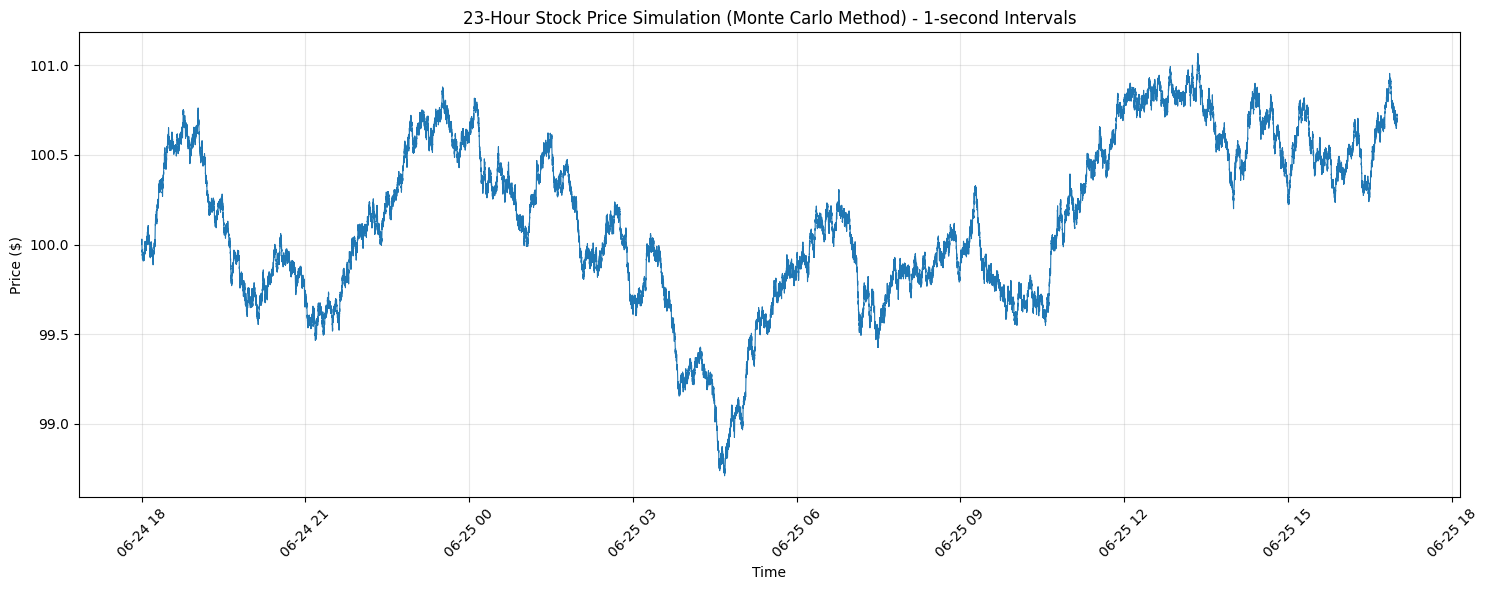

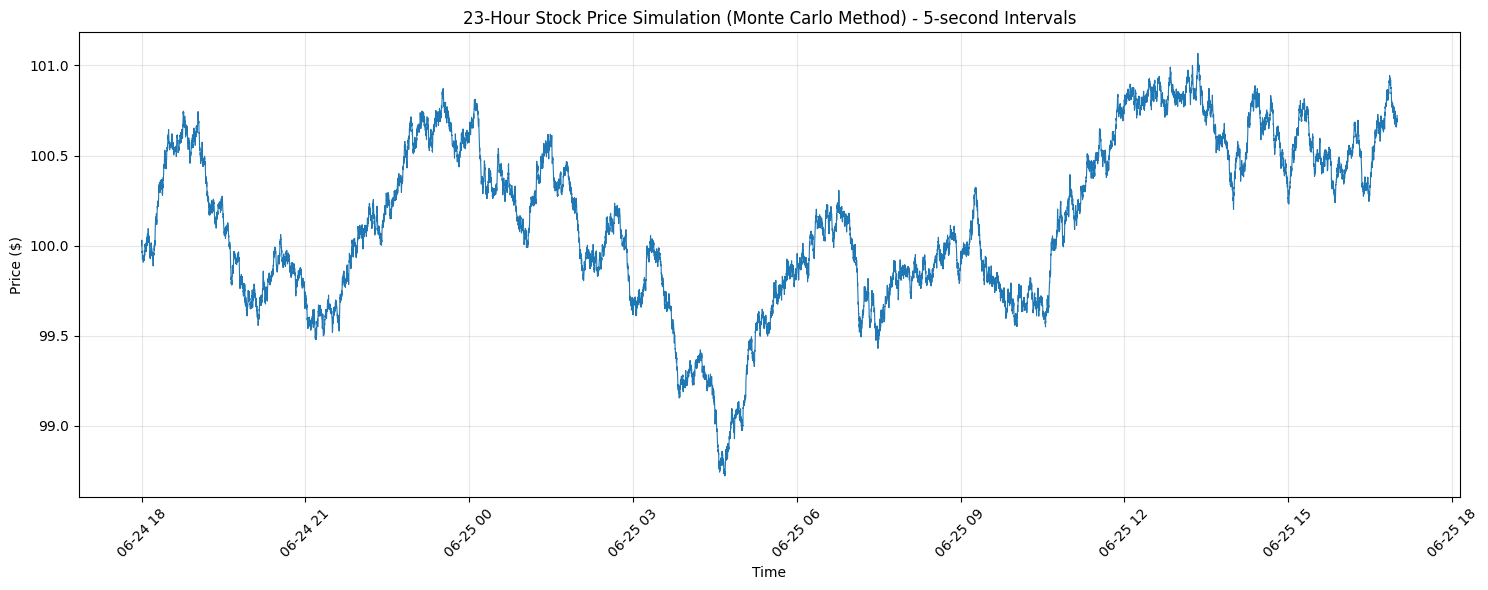

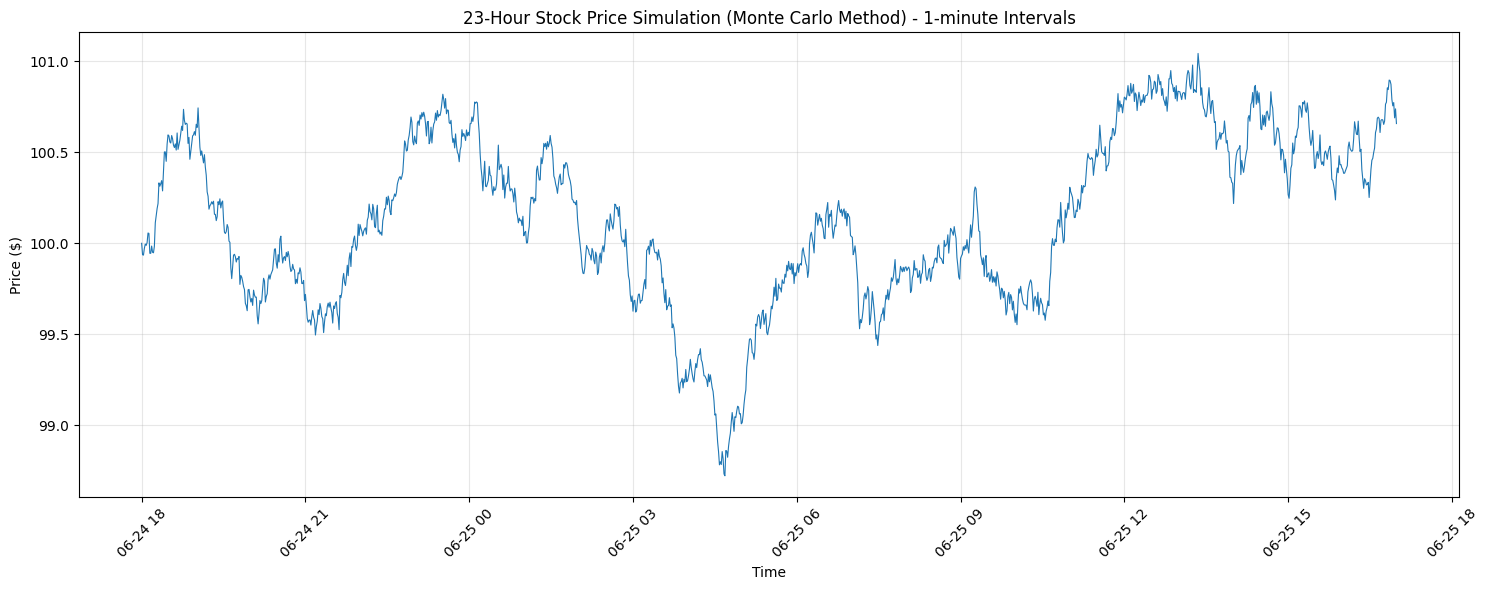

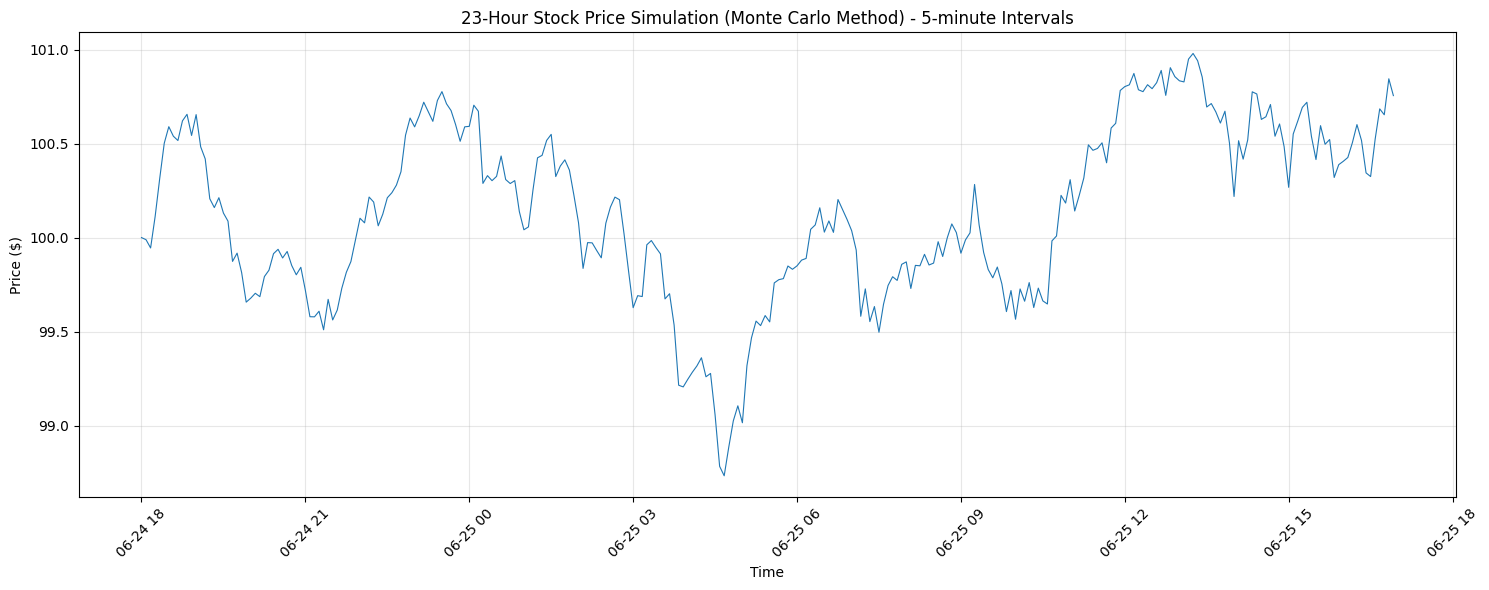

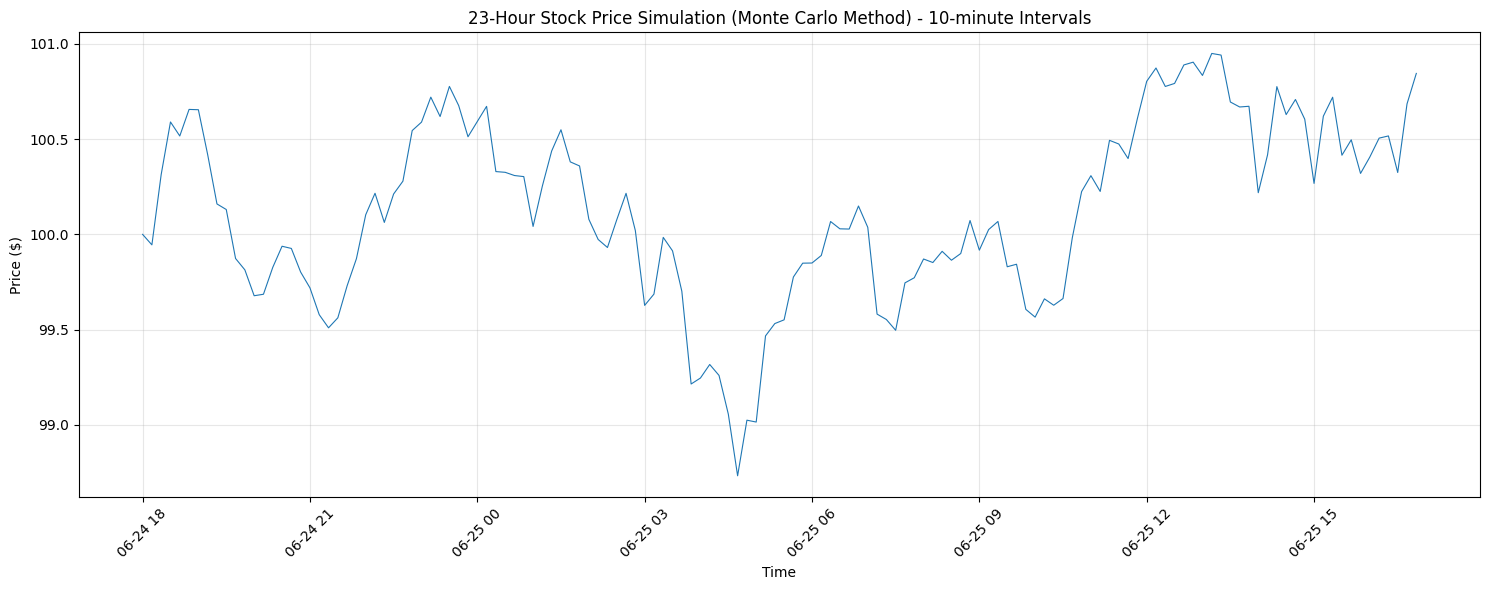

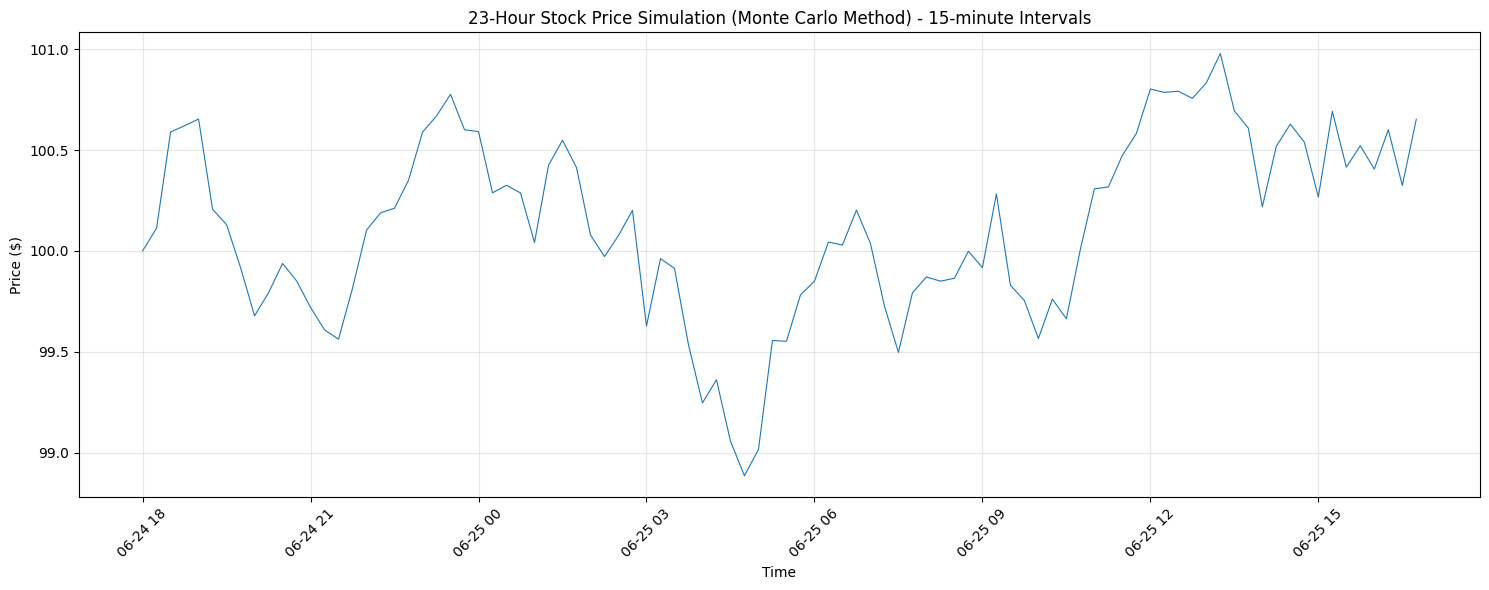

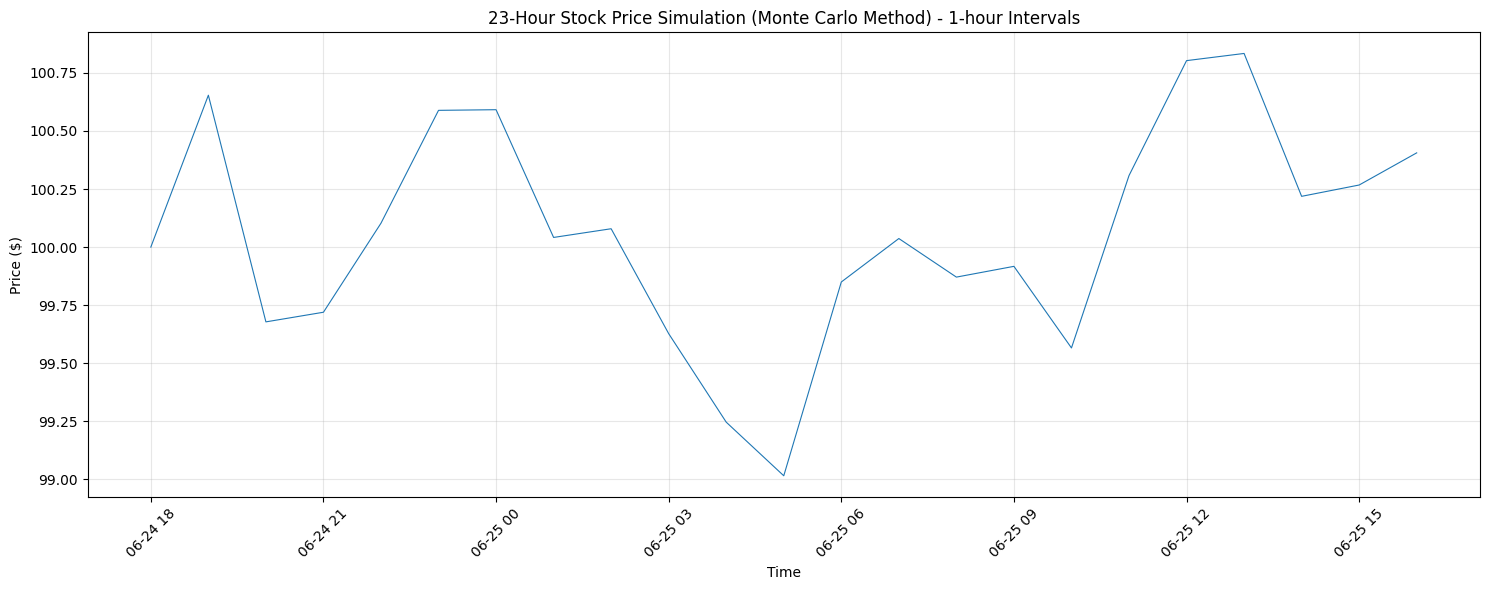

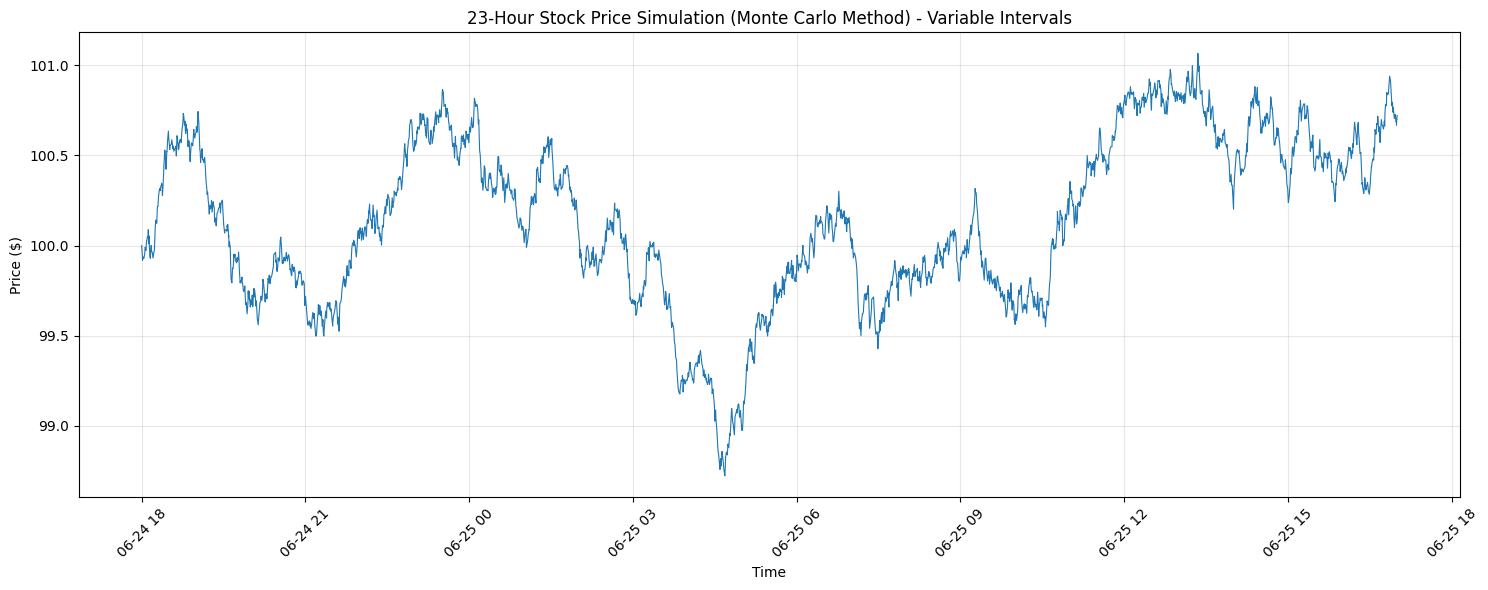

In [111]:
# Generate the data with 1 second intervals for 23 hours
interval = 1  # 1 second intervals
hours = 23  
np.random.seed(42)  # For reproducible results
stock_df = generate_stock_price_data(interval=1, hours=hours) # 1-second intervals

# from stock_df, create different intervals
stock_1sec = stock_df.copy()

stock_5sec = stock_df[::5].reset_index(drop=True)  # Every 5th row for 5-second intervals
stock_1min = stock_df[::60].reset_index(drop=True)  # Every 60th row for 1-minute intervals
stock_5min = stock_df[::300].reset_index(drop=True)  # Every 300th row for 5-minute intervals
stock_10min = stock_df[::600].reset_index(drop=True)  # Every 600th row for 10-minute intervals
stock_15min = stock_df[::900].reset_index(drop=True)  # Every 600th row for 15-minute intervals
stock_1hour = stock_df[::3600].reset_index(drop=True)  # Every 3600th row for 1-hour intervals
stock_variable = create_variable_interval_data(stock_df, min_interval=1, max_interval=60) # variable intervals


# Plot the stock price over the specified time period
for df, label in zip([stock_1sec, stock_5sec, stock_1min, stock_5min, stock_10min, stock_15min, stock_1hour, stock_variable], 
                   ['1-second', '5-second', '1-minute', '5-minute', '10-minute', '15-minute', '1-hour', 'Variable']):
    plt.figure(figsize=(15, 6))
    plt.plot(df['timestamp'], df['price'], linewidth=0.8, label=f'{label} intervals')
    plt.title(f'{hours:.0f}-Hour Stock Price Simulation (Monte Carlo Method) - {label} Intervals')
    plt.xlabel('Time')
    plt.ylabel('Price ($)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Time-Based Exponential Moving Average

This section contains a function to calculate **Exponential Moving Average (EMA)** based on time periods rather than row counts, which is more appropriate for financial data analysis.

In [112]:
import numpy as np
import pandas as pd
from datetime import timedelta

def calculate_time_based_ema(stock_df, period_minutes=15):
    """
    Calculate Exponential Moving Average based on actual time period (minutes) using timestamps.
    
    Parameters:
    -----------
    stock_df : pandas.DataFrame
        DataFrame containing 'timestamp' and 'price' columns
    period_minutes : int, default=15
        The time period in minutes for the EMA calculation
    
    Returns:
    --------
    pandas.Series
        Series containing the EMA values aligned with the input DataFrame index
    
    Notes:
    ------
    - This function is truly time-based and uses actual timestamps, not row counts
    - The smoothing factor (alpha) is calculated based on the actual time period
    - Works with any data frequency (1-second, 5-second, 1-minute, etc.)
    - EMA formula: EMA_today = (Price_today * α) + (EMA_yesterday * (1 - α))
    - Where α = 2 / (N + 1), and N is calculated from the actual time period
    """
    
    # Validate input DataFrame
    if not isinstance(stock_df, pd.DataFrame):
        raise ValueError("stock_df must be a pandas DataFrame")
    
    if 'timestamp' not in stock_df.columns or 'price' not in stock_df.columns:
        raise ValueError("DataFrame must contain 'timestamp' and 'price' columns")
    
    if len(stock_df) == 0:
        return pd.Series(dtype=float)
    
    if len(stock_df) < 2:
        # If only one data point, return the price itself
        return pd.Series([stock_df['price'].iloc[0]], index=stock_df.index)
    
    # Calculate the actual time interval between data points (in seconds)
    time_diffs = stock_df['timestamp'].diff().dropna()
    avg_interval_seconds = time_diffs.dt.total_seconds().mean()
    
    # Calculate the equivalent number of periods for the specified time window
    period_seconds = period_minutes * 60
    equivalent_periods = period_seconds / avg_interval_seconds
    
    # Calculate smoothing factor (alpha) based on equivalent periods
    # Using standard EMA formula: α = 2 / (N + 1)
    alpha = 2.0 / (equivalent_periods + 1)
    
    # Initialize EMA series
    ema_values = []
    
    # First EMA value is the first price
    ema_values.append(stock_df['price'].iloc[0])
    
    # Calculate EMA for subsequent values using time-based smoothing
    for i in range(1, len(stock_df)):
        current_price = stock_df['price'].iloc[i]
        previous_ema = ema_values[-1]
        
        # Calculate time elapsed since previous data point
        time_elapsed = (stock_df['timestamp'].iloc[i] - stock_df['timestamp'].iloc[i-1]).total_seconds()
        
        # Adjust alpha based on actual time elapsed vs expected interval
        # This ensures consistency regardless of irregular timestamps
        time_weight = time_elapsed / avg_interval_seconds
        adjusted_alpha = 1 - (1 - alpha) ** time_weight
        
        # EMA formula with time-adjusted smoothing
        current_ema = adjusted_alpha * current_price + (1 - adjusted_alpha) * previous_ema
        ema_values.append(current_ema)
    
    # Return as pandas Series with the same index as input DataFrame
    return pd.Series(ema_values, index=stock_df.index, name=f'EMA_{period_minutes}min')

In [117]:
# df = stock_1sec.copy()  # Use the 1-second interval data for EMA calculation
# df = stock_5sec.copy()  # Use the 5-second interval data for EMA calculation
# df = stock_1min.copy()  # Use the 1-minute interval data for EMA calculation
# df = stock_5min.copy()  # Use the 5-minute interval data for EMA calculation
# df = stock_1hour.copy()  # Use the 1-hour interval
df = stock_variable.copy()  # Use the 1-hour interval


# Add EMA to the DataFrame
df['EMA_15min'] = calculate_time_based_ema(df, period_minutes=15)
df['EMA_30min'] = calculate_time_based_ema(df, period_minutes=30)
df['EMA_60min'] = calculate_time_based_ema(df, period_minutes=60)

# Display updated DataFrame
print(f"DataFrame updated with EMA columns. Shape: {stock_df.shape}")
print("\nFirst 10 rows with all EMAs:")
print(df[['timestamp', 'price', 'EMA_15min', 'EMA_30min', 'EMA_60min']].head(10))

# stock_df

DataFrame updated with EMA columns. Shape: (82800, 2)

First 10 rows with all EMAs:
            timestamp       price   EMA_15min   EMA_30min   EMA_60min
0 2025-06-24 18:00:00  100.000000  100.000000  100.000000  100.000000
1 2025-06-24 18:00:49   99.935315   99.993324   99.996572   99.998263
2 2025-06-24 18:00:53   99.918311   99.992660   99.996225   99.998085
3 2025-06-24 18:01:35   99.937100   99.987707   99.993529   99.996679
4 2025-06-24 18:02:19   99.928373   99.982178   99.990420   99.995029
5 2025-06-24 18:03:17   99.950888   99.978393   99.987952   99.993630
6 2025-06-24 18:03:51   99.991067   99.979316   99.988068   99.993582
7 2025-06-24 18:04:37   99.972676   99.978670   99.987301   99.993054
8 2025-06-24 18:04:44   99.974092   99.978600   99.987199   99.992981
9 2025-06-24 18:05:21  100.026853   99.982410   99.988796   99.993670


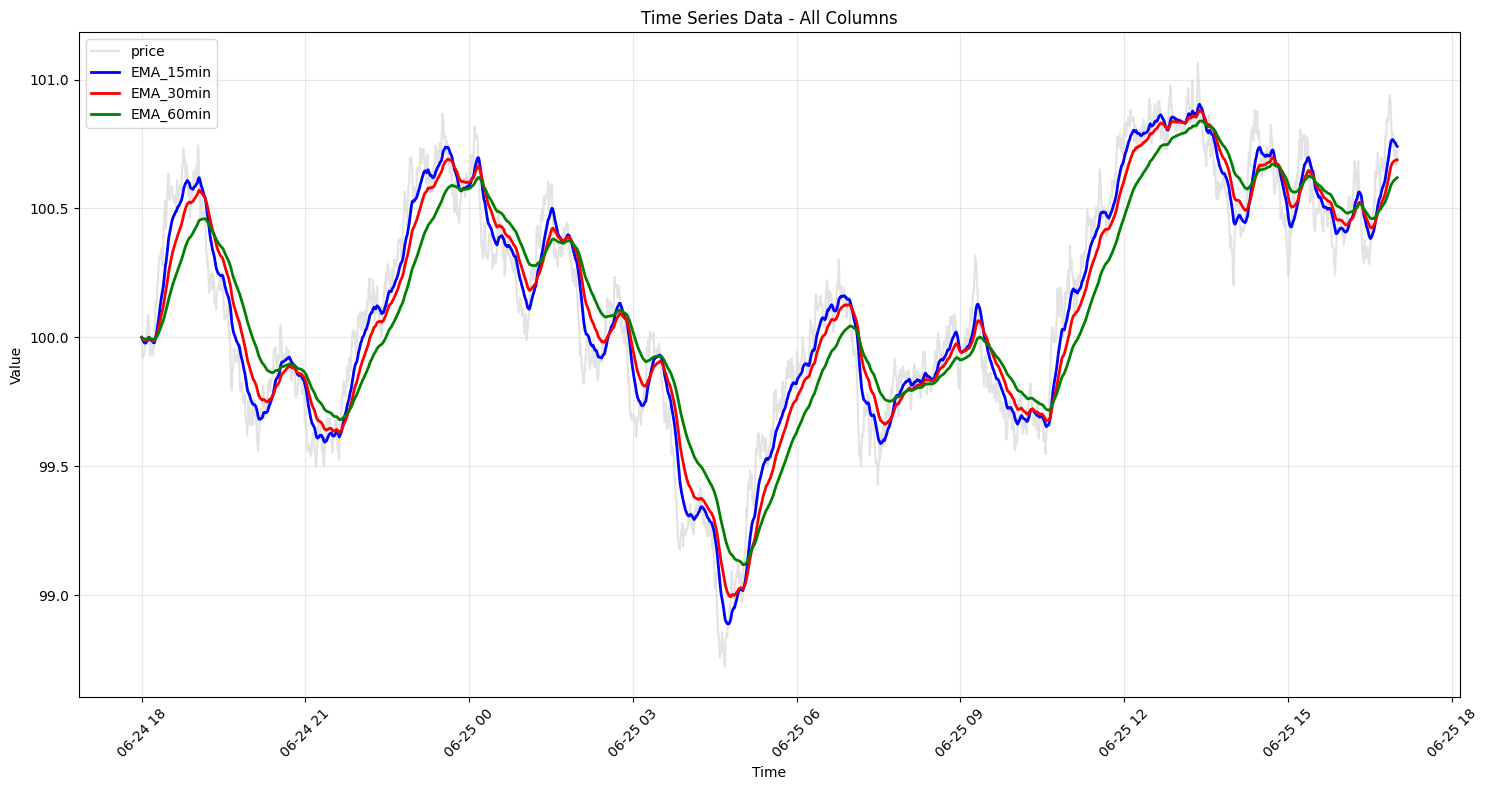

Plotted 4 columns: ['price', 'EMA_15min', 'EMA_30min', 'EMA_60min']


In [119]:
import matplotlib.pyplot as plt

def plot_time_series(df, exclude_columns=None):
    """
    Plot all columns except timestamp and excluded columns dynamically
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with timestamp column and data columns to plot
    exclude_columns : list or None
        List of column names to exclude from plotting (in addition to 'timestamp')
    """
    if exclude_columns is None:
        exclude_columns = []
    
    # Always exclude timestamp, plus any user-specified columns
    all_excluded = ['timestamp'] + exclude_columns
    
    plt.figure(figsize=(15, 8))
    
    # Find all columns except excluded ones
    plot_columns = [col for col in df.columns if col not in all_excluded]
    colors = ['#dddddd', 'blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'olive', 'cyan', 'magenta']
    
    for i, col in enumerate(plot_columns):
        color = colors[i % len(colors)]  # Cycle through colors
        # Make first column (usually price) more prominent
        linewidth = 1.5 if i == 0 else 2
        alpha = 0.8 if i == 0 else 1.0
        plt.plot(df['timestamp'], df[col], 
                 color=color, linewidth=linewidth, alpha=alpha, label=col)
    
    plt.title('Time Series Data - All Columns')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    if exclude_columns:
        print(f"Excluded columns: {exclude_columns}")
    print(f"Plotted {len(plot_columns)} columns: {plot_columns}")

# Plot with no exclusions
plot_time_series(df, exclude_columns=None)

# Example: Plot excluding specific EMAs
# plot_time_series(stock_df, exclude_columns=['EMA_30min', 'EMA_60min'])